# 1. Exploratory data analysis

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load the dataset
df = pd.read_csv('accidents_2017.csv')

התמודדות עם ערכים חסרים:

In [192]:
#find missing values in the dataframe
missing_values = ["Unknown"]
df = pd.read_csv("accidents_2017.csv", na_values = missing_values)
df.isnull().sum()

Id                    0
District_Name        27
Neighborhood_Name    27
Street                0
Weekday               0
Month                 0
Day                   0
Hour                  0
Part_of_the_day       0
Mild_injuries         0
Serious_injuries      0
Victims               0
Vehicles_involved     0
Longitude             0
Latitude              0
dtype: int64

In [193]:
#find the index of rows without any car involved = the non-accident rows.
zero_vehicles = df.index[df['Vehicles_involved'] == 0].tolist()
#delete non-accident rows
df = df.drop(zero_vehicles)
df.head()

,Id,District_Name,Neighborhood_Name,Street,Weekday,Month,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
0,2017S000001,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,VIA AUGUSTA ...,Sunday,January,1,4,Night,1,0,1,1,2.151330,41.400771
1,2017S000002,Eixample,el Fort Pienc,GV CORTS CATALANES ...,Sunday,January,1,2,Night,1,0,1,2,2.182376,41.399680
2,2017S000003,Horta-Guinardó,el Baix Guinardó,RDA GUINARDÓ ...,Sunday,January,1,6,Morning,0,0,0,1,2.166464,41.412769
3,2017S000004,Eixample,la Sagrada Família,BALMES / Rosselló ...,Sunday,January,1,7,Morning,1,0,1,2,2.157359,41.393310
4,2017S000005,Sant Martí,el Parc i la Llacuna del Poblenou,PALLARS ...,Sunday,January,1,7,Morning,2,0,2,3,2.193249,41.397908


בסט הנתונים קיימים 54 ערכים חסרים בסה"כ, בפיצ'ריםDistrict Name ו Neighborhood Name
התלבטנו בין האפשרויות הבאות:
1. למחוק את הרשומות עם הmissing values.
2. למלא בעזרת classification.
3. למלא בעזרת חישובים מתמטיים.
4. להשאיר את המידע החסר.

החלטנו שלא לשנות את הערכים החסרים כיוון שהם נמצאים בפיצ'רים שאינם רלוונטיים לשאלות שלנו, ולכן החלטנו רק להחליף אותם לערכים NaN על מנת שנוכל לערוך חישובים בעזרת פונקציות שיודעות להתעלם מערכים חסרים כאשר נרצה לנתח את העמודות הללו.

בנוסף, שמנו לב כי קיימות רשומות בהן אין רכבים מעורבים ולכן גם אין קורבנות. אנחנו מבינים שאלו missingvalues עבורנו -
לא יכולה להיות תאונה ללא נפגע או רכב מעורב, כלומר זוהי לא תאונה.
מחקנו את רשומות אלו מסט הנתונים.

### כמות התאונות שהתרחשו לפי כמות כלי רכב מעורבים

In [194]:
# group by the amount of vehicles involved
df_vehicles = pd.DataFrame(df.groupby('Vehicles_involved')['Id'].count()).reset_index()

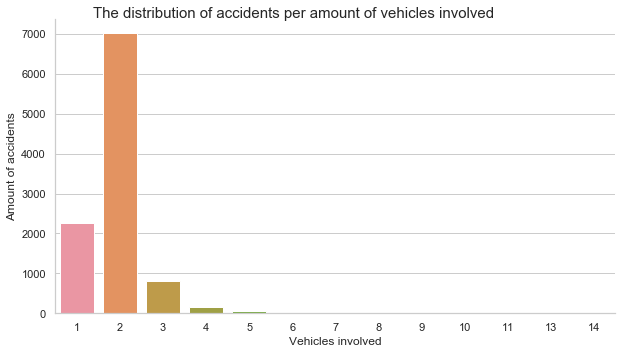

In [195]:
#create a bar plot
sns_object = sns.catplot(data=df_vehicles, kind='bar', x='Vehicles_involved', y='Id')
sns_object.set_xticklabels(rotation=0) # Rotate the x label ticks text
sns_object.fig.set_size_inches(10,5) # set figure size
sns_object.fig.suptitle('The distribution of accidents per amount of vehicles involved\n\n',size = 15) # set figure title
sns_object.set(ylabel='Amount of accidents',xlabel='Vehicles involved') # set label

ניכר כי מרבית התאונות היו עם 2 רכבים, וכי תאונות בהן מעורבים 5 רכבים ויותר נדירות.

### כמות התאונות שהתרחשו לפי החלק ביום (לילה, בוקר ואחה"צ)

In [103]:
# grop the data by the part in the day
df_dayParts = pd.DataFrame(df.groupby('Part_of_the_day')['Id'].count()).reset_index()
df.shape[0] == df_dayParts['Id'].sum() # check that we didnt loose any data

True

Text(0.5, 0.98, 'The distribution of accidents in parts of the day')

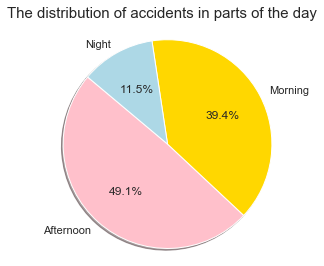

In [196]:
labels = df_dayParts['Part_of_the_day']
sizes = df_dayParts['Id']
colors = ['pink', 'gold', 'lightblue']

# create a pie chart
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140,radius = 1.2)
plt.suptitle('The distribution of accidents in parts of the day', fontsize = 15)

מרבית התאונות מתרחשות בשעות אחה"צ או בבוקר, תאונות מעטות מתרחשות בלילה. מסקרן לבדוק האם התאונות המתרחשות בלילה קטלניות יותר מהתאונות ביום.

### כמות התאונות שהתרחשו לפי יום בשבוע

In [197]:
# group the data by weekday and sum the nim of accidents occured
df_days = pd.DataFrame(df.groupby('Weekday')['Id'].count()).reset_index()
df_days

,Weekday,Id
0,Friday,1761
1,Monday,1509
2,Saturday,1155
3,Sunday,893
4,Thursday,1675
5,Tuesday,1691
6,Wednesday,1650


In [198]:
# sort the dataset by the order of days
d = {
    'Weekday':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    'Accidents':[1509,1691,1650,1675,1761,1155,893]}
df_dayssrtd = pd.DataFrame(d,columns=['Weekday','Accidents'])

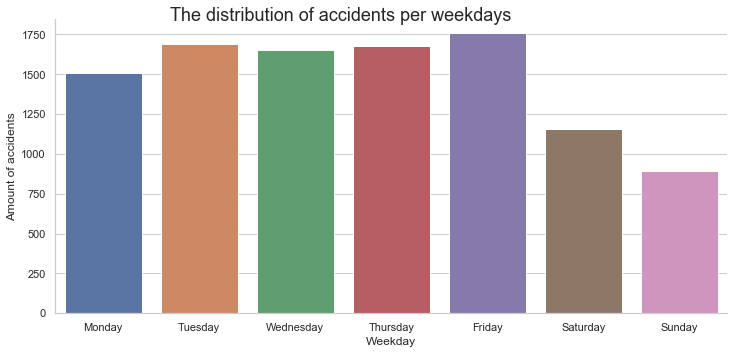

In [199]:
#create a bar plot
sns_object = sns.catplot(data=df_dayssrtd, kind='bar', x='Weekday', y='Accidents')
sns_object.set_xticklabels(rotation=0) # Rotate the x label ticks text
sns_object.fig.set_size_inches(12,5) # set figure size
sns_object.fig.suptitle('The distribution of accidents per weekdays',size = 18) # set figure title
sns_object.set(ylabel='Amount of accidents',xlabel='Weekday') # set label

נראה כי כמות התאונות בכל יום במהלך השבוע מתפלגות באופן כמעט זהה, עם זאת בסופי השבוע ניתן לראות ירידה משמעותית במספר התאונות.
מסקרן יהיה לבדוק האם יש לכך קשר של סיבתיות.

### עשרת השכונות בהן התרחשו הכי הרבה תאונות וכמות התאונות בהן

In [200]:
# group the data by neighborhoods
df_nbs = pd.DataFrame(df.groupby('Neighborhood_Name')['Id'].count()).reset_index()
# sort the dataframe by amount of accidents in descending order
df_nbs = df_nbs.sort_values('Id',ascending=False).reset_index()

df_nbs.head()

,index,Neighborhood_Name,Id
0,51,la Dreta de l'Eixample,1167
1,47,l'Antiga Esquerra de l'Eixample,588
2,58,la Nova Esquerra de l'Eixample,387
3,16,Sant Gervasi - Galvany,384
4,60,la Sagrada Família,377


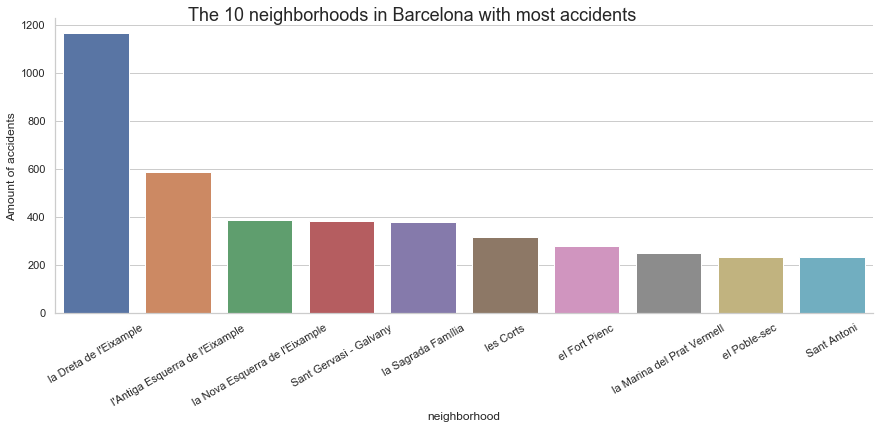

In [201]:
# create a bar plot
sns_object = sns.catplot(data=df_nbs[:10], kind='bar', x='Neighborhood_Name', y='Id')
sns_object.set_xticklabels(rotation=30) # Rotate the x label ticks text
sns_object.fig.set_size_inches(15,5) # set figure size
sns_object.fig.suptitle('The 10 neighborhoods in Barcelona with most accidents',size = 18) # set figure title
sns_object.set(ylabel='Amount of accidents',xlabel='neighborhood') # set label

נראה כי יש שכונה אחת שבאופן קיצוני מתרחשות בה יותר תאונות מבשאר השכונות. הדבר נראה לנו מעורר ספק, כיוון שייתכן שזה כי זו שכונה גדולה במיוחד, או שנאספו עליה יותר דגימות.
מאידך, ייתכן כי הנתון הזה משקף את המציאות וזו אכן שכונה עם תאונות רבות יותר עקב נהיגה לא זהירה או בעיית תשתיות.

### כמות התאונות שהתרחשו לפי השעה ביום

In [202]:
# group the dataframe by the time (hour)
df_hours = pd.DataFrame(df.groupby('Hour')['Id'].count()).reset_index()
# sort the hours by the order in the day in ascending order
df_hours = df_hours.sort_values('Hour',ascending=True)

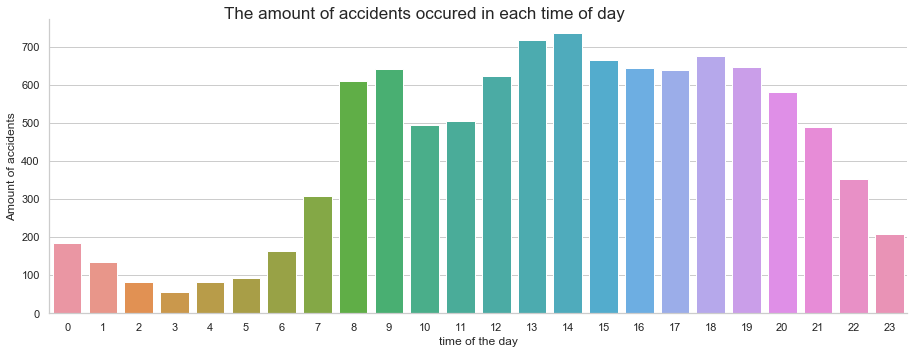

In [203]:
# create a bar plot
sns_object = sns.catplot(data=df_hours, kind='bar', x='Hour', y='Id')
sns_object.set_xticklabels(rotation=0) # Rotate the x label ticks text
sns_object.fig.set_size_inches(15,5) # set figure size
sns_object.fig.suptitle('The amount of accidents occured in each time of day',size = 17) # set figure title
sns_object.set(ylabel='Amount of accidents',xlabel='time of the day') # set labels

אנחנו רואים כי בשעות הבוקר - 7 עד 8 יש עלייה חדה במספר התאונות, ולאחר מכן ירידה, וא שוב עלייה חדה החל מהשעה 12 בצהריים. הכמות יורת משמעותית לאחר השעה 20 בערב, כאשר בלילה מתרחשות הכי מעט תאונות.

מעניין לראות האם יש הבדל בין שעות מרובות תאונות באמצע השבוע ובסוף השבוע:

In [112]:
# gets a day and returns the part of the week it belongs to
def weekPart(day):
    if (day == 'Saturday' or day == 'Sunday'):
        return 'Weekend'
    else:
        return 'Mid-week'

In [113]:
# add a column telling in which part of the week it occured
df['Week_part'] = df.apply(lambda row: weekPart(row['Weekday']), axis=1)
df.head()

,Id,District_Name,Neighborhood_Name,Street,Weekday,Month,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude,Week_part
0,2017S000001,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,VIA AUGUSTA ...,Sunday,January,1,4,Night,1,0,1,1,2.151330,41.400771,Weekend
1,2017S000002,Eixample,el Fort Pienc,GV CORTS CATALANES ...,Sunday,January,1,2,Night,1,0,1,2,2.182376,41.399680,Weekend
2,2017S000003,Horta-Guinardó,el Baix Guinardó,RDA GUINARDÓ ...,Sunday,January,1,6,Morning,0,0,0,1,2.166464,41.412769,Weekend
3,2017S000004,Eixample,la Sagrada Família,BALMES / Rosselló ...,Sunday,January,1,7,Morning,1,0,1,2,2.157359,41.393310,Weekend
4,2017S000005,Sant Martí,el Parc i la Llacuna del Poblenou,PALLARS ...,Sunday,January,1,7,Morning,2,0,2,3,2.193249,41.397908,Weekend


In [114]:
# divide the dataframe into to df - one contains weekend accidents and the other contains mid-week accidents.
midweek = df.index[df['Week_part'] == 'Mid-week'].tolist()
df_weekend = df.drop(midweek)
weekend = df.index[df['Week_part'] == 'Weekend'].tolist()
df_midweek = df.drop(weekend)
print(df_midweek.shape[0]+df_weekend.shape[0] == df.shape[0]) # check if we got all the data

True


In [115]:
# group by the hour of the accidents and sort the df
df_hoursE = pd.DataFrame(df_weekend.groupby('Hour')['Id'].count()).reset_index() #for weekend df
df_hoursE = df_hoursE.sort_values('Hour',ascending=True)

df_hoursM = pd.DataFrame(df_midweek.groupby('Hour')['Id'].count()).reset_index() # for mid-week df
df_hoursM = df_hoursM.sort_values('Hour',ascending=True)

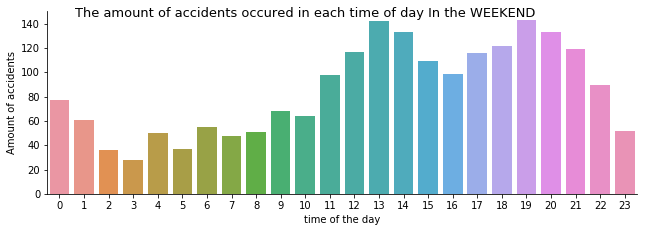

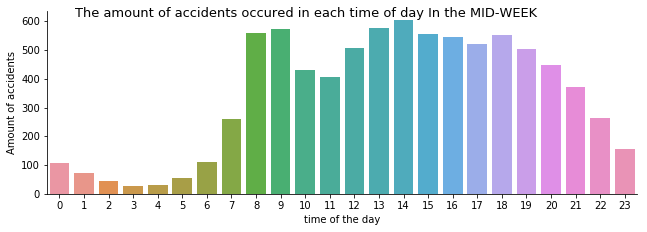

In [116]:
# create a bar plot for weekend
ax1 = sns.catplot(data=df_hoursE, kind='bar', x='Hour', y='Id')
ax1.fig.suptitle('The amount of accidents occured in each time of day In the WEEKEND',size = 13) # set figure title
ax1.set(ylabel='Amount of accidents',xlabel='time of the day') # set labels
ax1.fig.set_size_inches(10,3) # set figure size

# create a bar plot for mid-week
ax2 = sns.catplot(data=df_hoursM, kind='bar', x='Hour', y='Id')
ax2.fig.suptitle('The amount of accidents occured in each time of day In the MID-WEEK',size = 13) # set figure title
ax2.set(ylabel='Amount of accidents',xlabel='time of the day') # set labels
ax2.fig.set_size_inches(10,3) # set figure size

אנחנו רואים הבדל בשעות מסויימות - למשל השעות 7-8 בבוקר והשעה 16:00 אחה"צ שרוויות תאונות במהלך השבוע אך לא בסוף השבוע.

ההבדל העיקרי בין הגרפים הוא כמות התאונות המתרחשות, זאת בהמשך למה שראינו בגרפים הקודמים - הרבה פחות תאונות מתרחשות בכל השעות בסוף השבוע.

*בחרנו להשאיר את הסקאלות של הגרפים באופן מותאם לכל גרף ולא לאזן אותם. הבחירה נובעת מהרצון לראות איזה שעות רוויות תאונות ביחס לשעות אחרות באותם ימים ולא להעמיס על העיניים בכמות התאונות היחסית לשאר הימים.

### בדיקת קשר בין כמות הנפגעים ומספר הרכבים המעורבים בתאונה לזמן בשבוע שבו מרבית התאונות עם מאפיינים אלו התרחשו 

Text(0.5, 1.0, 'Accidents in weekend or mid-week by the Victims and vehicles involved\n')

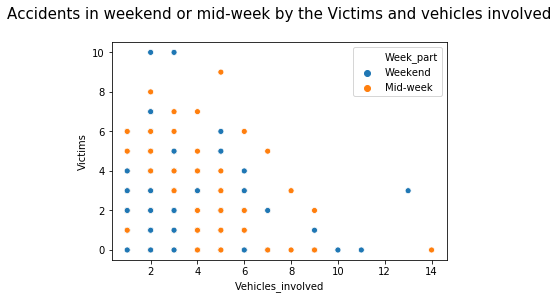

In [117]:
# create a scatter plot
sns_object = sns.scatterplot(x= 'Vehicles_involved',y = 'Victims', hue='Week_part', data=df)
plt.title('Accidents in weekend or mid-week by the Victims and vehicles involved\n',size = 15) # set figure title

בגרף הזה אנחנו רואים תאונות לפי כמות הרכבים המעורבים בתאונה לעומת כמות הנפגעים בתאונת הדרכים (הנפגעים = פצועים קל + פצועים קשה),
מסווגות לפי מתי מרבית התאונות עם מס' כאלה התרחשו: אמצע השוע או סוף השבוע.
מעניין אותנו לבדוק האם אכן ניתן לסווג תאונות אם הן התרחשו באמצע/סוף השבוע לפי נתונים אלו ואחרים.

# 2. Estimation and hypothesis testing

a. Clearly state your null hypothesis and alternative hypothesis.
b. Run the test and report the results in a comprehensive way.

השערת האפס: כמות הקורבנות הממוצעת בלילה שווה לכמות הקורבנות הממוצעת ביום ובאחה"צ.
בניסוח מתמטי: 
* n- night average victims
* d - afternoon and morning average victims
* => n-d = 0

השערת אלטרנטיבית: כמות הקורבנות הממוצעת בלילה קטנה מכמות הקורבנות הממוצעת ביום ובאחה"צ.
בניסוח מתמטי: 
* n- night average victims
* d - afternoon and morning average victims
* => n-d < 0

In [118]:
# gets a part of the day and returns the part of the day it belongs to
def dayPart(partOfTheDay):
    if (partOfTheDay == 'Night'):
        return 'Night'
    else:
        return 'Day'

In [119]:
# add a column telling in which part of the day it occured
df['Day_part'] = df.apply(lambda row: dayPart(row['Part_of_the_day']), axis=1)
df.head()

,Id,District_Name,Neighborhood_Name,Street,Weekday,Month,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude,Week_part,Day_part
0,2017S000001,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,VIA AUGUSTA ...,Sunday,January,1,4,Night,1,0,1,1,2.151330,41.400771,Weekend,Night
1,2017S000002,Eixample,el Fort Pienc,GV CORTS CATALANES ...,Sunday,January,1,2,Night,1,0,1,2,2.182376,41.399680,Weekend,Night
2,2017S000003,Horta-Guinardó,el Baix Guinardó,RDA GUINARDÓ ...,Sunday,January,1,6,Morning,0,0,0,1,2.166464,41.412769,Weekend,Day
3,2017S000004,Eixample,la Sagrada Família,BALMES / Rosselló ...,Sunday,January,1,7,Morning,1,0,1,2,2.157359,41.393310,Weekend,Day
4,2017S000005,Sant Martí,el Parc i la Llacuna del Poblenou,PALLARS ...,Sunday,January,1,7,Morning,2,0,2,3,2.193249,41.397908,Weekend,Day


In [120]:
# get the avg of victims in day-time accidents
df_day = df.loc[df.Day_part == 'Day']
day_mean = df_day['Victims'].mean()
day_mean

1.1814106068890105

In [121]:
# get the avg of victims in night-time accidents
df_night = df.loc[df.Day_part == 'Night']
night_mean = df_night['Victims'].mean()
night_mean

1.1623212783851977

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


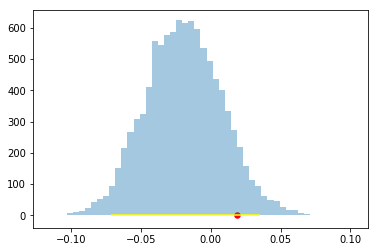

0.01908932850381273


In [122]:
# calculate the average for a sample for a day part.
def computeRate(sample, level):
    level_sample = sample.loc[sample.Day_part == level]
    return level_sample['Victims'].mean()

# claculate the diff between the average of the two groups
def computeDiff(sample):
    night_rate = computeRate(sample, 'Night')
    day_rate = computeRate(sample, 'Day')
    return night_rate - day_rate  

# simulates random samples and returns an array of the diff between the two groups
def bootstrapDifference(num_replications):
    parts_diffs = np.zeros(num_replications)
    for i in range(num_replications):
        bootstrap_sample = df.sample(df.shape[0], replace=True)
        parts_diffs[i] = computeDiff(bootstrap_sample)
        
    return parts_diffs

parts_diffs = bootstrapDifference(10000)
ax = sns.distplot(parts_diffs, kde=False)
red_dot = day_mean - night_mean #real average diffs

# mark the middle 95% interval
left = np.percentile(parts_diffs, 2.5, interpolation='higher')
right = np.percentile(parts_diffs, 97.5, interpolation='higher')

plt.scatter(red_dot, 0, color='red', s=30)
plt.hlines(0, left, right, colors='yellow', linestyles='solid')  # Mark the "middle 95%" by yellow line
plt.show() # Show the numerical result of the test and plot demonstrating

print(red_dot)

באופן כללי, מתוך דגימה אקראית שנבחר, מרבית הסיכוי יהיה שאכן התאונות שמתרחשות בלילה גבו פחות תאונות מאשר התאונות שהתרחשו ביום.

אבל - ניתן לראות כי הפרש 0 בין הממוצעים בדגימות קיים בגרף, ואף בעל סיכוי גבוה להתרחש.
לכן, לא נוכל לדחות את השערת האפס ברמת דיוק של מעל 95% ועל כן לא ניתן להסיק באופן חד-משמעי כי התאונות שמתרחשות בשעות הלילה גובות פחות תאונות מאשר התאונות שמתרחשות ביום. 

# 3. Prediction

התווית שאנחנו רוצים לבדוק אם נוכל לחזות: week part.

תווית זו מסמלת האם התאונה התרחשה במהלך השבוע (ימים שני-שישי) או בסוף השבוע (ימים ראשון ושבת).
ננסה לחזות אותה ע"פ המשתנים:
1. Hour - השעה מעידה הרבה על התאונה - האם התרחשה ביום/אחה"צ/בלילה והאם התרחשה בשעות עומס.
ישנו הבדל בין משמעות של שעה מסויימת במהלך השבוע, למשל השעה 7 בבוקר לעומת אותה שעה בסוף השבוע. אנו לוקחים כאן הנחה כי באמצע השבוע יש יותר מכוניות, אך לפי דעתנו הנחה זו מבוססת ונכונה לכל העולם.
2. Victims - מאפיין זה הוא מהחלקים העיקריים של השאלה שלנו. האם נוכל לסווג את התאונות לאיזה חלק בשבוע הן התרחשו ע"פ כמות הנפגעים?
3. Serious_injuries, Mild_injuries - וכל לתת כך יותר נפח ומשמעות לכמות הנפגעים בכך שנוכל לסווג את עוצמת הפגיעה ולאפיין באופן מדוייק יותר את חומרת התאונה.
4. Vehicles_involved - מאפיין זה הוא מהחלקים העיקריים של השאלה שלנו. האם נוכל לסווג את התאונות לאיזה חלק בשבוע הן התרחשו ע"פ כמות הרכבים המעורבים?

ע"פ משתנים אלו, ננסה לסווג את חומרת התאונות ולאפיין אותן ובעזרתם ננסה לחזות האם התאונה התרחשה באמצע השבוע או בסופו.

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [124]:
#filtering the df to numeric and relevant featurs for the classification
df_classifiation = df.iloc[:,7:16]
del df_classifiation['Part_of_the_day']
del df_classifiation['Latitude']
del df_classifiation['Longitude']
df_classifiation.head()

,Hour,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Week_part
0,4,1,0,1,1,Weekend
1,2,1,0,1,2,Weekend
2,6,0,0,0,1,Weekend
3,7,1,0,1,2,Weekend
4,7,2,0,2,3,Weekend


In [125]:
# spliting our dataset into its features and labels
X = df_classifiation.iloc[:, :-1].values # features
Y = df_classifiation.iloc[:, -1].values# labels

In [126]:
#divide our dataset into training and test splits
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)
def classificationScoreForK(k):
    classifier = KNeighborsClassifier(n_neighbors=k) # starting from k=5
    classifier.fit(X_train, Y_train) # train the model 
    Y_pred = classifier.predict(X_test) # test the model
    testScore = classifier.score(X_test, Y_test) # get a score for the test section
    return testScore

In [127]:
#check the best k we can have and its result
scores = [0 for i in range(35)]
max = 0
for k in range (1,35):
    scores[k] =classificationScoreForK(k)
    if max < scores[k]: max = scores[k]
        
print("The max accuracy: ",max)

The max accuracy:  0.8016448959845186


הצלחנו להגיע לרמת סיווג נכונה בכ- 81% (המס' משתנה בכל ריצה לכן המס' המדוייק נמצא כאן למעלה).
לדעתנו, זו רמת דיוק לא מספקת ולכן לא ניתן לחזות באיזה חלק בשבוע התרחשה התאונה ע"פ שעת התאונה, מס' נפגעים ומס' רכבים מעורבים.

# Bonus Part

החלטנו לבדוק בחלק זה מה הסיבה לחריגות בנתונים על כמות התאונות בשכונה 	la Dreta de l'Eixample.
בשכונה זו, כמות התאונות בשנת 2017, היא 1167 בשנה, הכי גבוה בטבלה, בפער של כמעט פי 2 מהשכונה הבאה בטבלה.

העלנו מספר השערות לסיבה:
1. איכות ירודה של תשתיות.
2. מקום מרכזי או עמוס בבני אדם - מקומות תעסוקה רבים, כמות גדולה של אוכלוסייה.
3. טעות באיסוף הנתונים  - חוסר בנתונים על תאונות בשכונות אחרות מה שגורם להטייה לגבי כמות התאונות בשכונה.

היו לנו נתונים על כמות אוכלוסייה ונתוני אבטלה. יכול להיות שאם נמצא כי מדובר בשכונה בעלת אחוז אבטלה נמוך ביחס לשכונות אחרות, הדבר  יוכל להסביר את כמות התאונות:
* בשכונה מקומות תעסוקה רבים ולכן עמוסה באנשים.
* גם אם אנשי השכונה לא עובדים בשכונה הם עוברים בכבישים ובצמתים ויוצאים הרבה מהבית.
* אם זו שכונה עם כמות גדולה של אוכלוסייה זו כנראה אחת מהשכונות הגדולות.

### ניצור דאטאפריים מאוחד

In [128]:
# load the unemployment df
df1 = pd.read_csv('unemployment.csv')
# filter for end of 2017 data only
df1 = df1.loc[df1.Year == 2017]
df1 = df1.loc[df1.Month == 'December']

# create a df for unemployment in each neighborhood
nbs_unemployment = pd.DataFrame(df1.groupby('Neighborhood Name')['Number'].sum()).reset_index()
nbs_unemployment.columns = ['Neighborhood_Name','Unemployment'] # set better names for the columns
nbs_unemployment.head()

,Neighborhood_Name,Unemployment
0,Baró de Viver,153
1,Can Baró,487
2,Can Peguera,143
3,Canyelles,573
4,Ciutat Meridiana,1137


In [132]:
# load the population df
df2 = pd.read_csv('population.csv')
# filter for 2017 data only
df2 = df2.loc[df2.Year == 2017]

# create a df for population in each neighborhood
nbs_population = pd.DataFrame(df2.groupby('Neighborhood.Name')['Number'].sum()).reset_index()
nbs_population.columns = ['Neighborhood_Name','Population'] # set better names for the columns
# organize the accidents - neighborhoods df to fit to the template of the population df
del df_nbs['index']
df_nbs.columns = ['Neighborhood_Name','Accidents']

In [133]:
# calculates the unemployment rate for a neighborhood
def unemploymentRate(population,unemployed):
    return (unemployed/population)*100

In [176]:
# join the dataframes into one df
nbs = nbs_population.join(nbs_unemployment.set_index('Neighborhood_Name'), on='Neighborhood_Name')
nbs = nbs.join(df_nbs.set_index('Neighborhood_Name'), on='Neighborhood_Name')
# add a cloumns for unemployment rate
nbs['Unemployment_rate'] = nbs.apply(lambda row: unemploymentRate(row['Population'],row['Unemployment']), axis=1)
nbs = nbs.sort_values('Accidents',ascending=False).reset_index() # sort by the amount of accidents
# drop rows with missing values
nbs.dropna(axis=0, how='any', inplace = True)
del nbs['index']
# take only the 20 neighborhoods with most accidents
nbs = nbs.head(10)
nbs

,Neighborhood_Name,Population,Unemployment,Accidents,Unemployment_rate
0,la Dreta de l'Eixample,44052,1668,1167.0,3.786434
1,l'Antiga Esquerra de l'Eixample,42284,1859,588.0,4.396462
2,la Nova Esquerra de l'Eixample,58180,2866,387.0,4.926091
3,Sant Gervasi - Galvany,47666,1317,384.0,2.762976
4,la Sagrada Família,51539,2593,377.0,5.031141
5,les Corts,46009,2257,318.0,4.905562
6,el Fort Pienc,32016,1605,277.0,5.013118
7,la Marina del Prat Vermell,1149,140,249.0,12.184508
8,Sant Antoni,38345,2067,233.0,5.390533
9,Sant Gervasi - la Bonanova,25774,736,209.0,2.855591


 יצרנו דאטא-פריים שמציג לכל שכונה:
 * כמות אוכלוסייה
 * מספר מובטלים
 * כמות תאונות 
 * אחוז אבטלה
 עבור סוף שנת 2017.
 
 בחרנו לנתח את הנתונים רק על עשרת השכונות עם הכי הרבה תאונות בברצלונה, כי מטרתנו היא לא לראות את הקשר בין המשתנים ואם קיימת התאמה ביניהן, אלא רק לנסות ולהסביר את הסיבה לכמות התאונות הגבוהה בשכונה la Dreta de l'Eixample.
 על כן, נשווה בינה לבין מספר מצומצם של שכונות.

עכשיו נציג גרפים שיבדקו האם אכן יש קשר בין אחוז האבטלה לבין כמות תאונות הדרכים בשכונה.

[Text(0, 0.5, 'Unemployment Rate'), Text(0.5, 0, 'Accidents')]

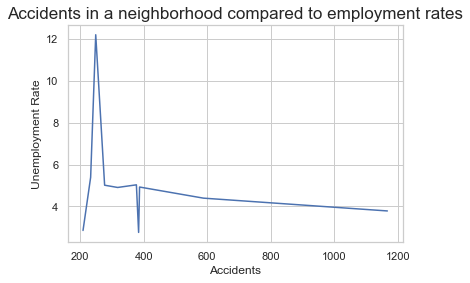

In [314]:
# create a line plot
sns_object = sns.set(style="whitegrid")
sns_object = sns.lineplot(x="Accidents", y="Unemployment_rate", data=nbs)
sns_object.set_title('Accidents in a neighborhood compared to employment rates',size = 17) # set figure title
sns_object.set(ylabel='Unemployment Rate',xlabel='Accidents') # set labels

בגרף זה, אנחנו רואים שהחל מ-300 תאונות דרכים בשנה, ככל שאחוז האבטלה נמוך, עולות כמות התאונות.

מדובר על 6 השכונות עם הכי הרבה תאונות דרכים ועל ירידה באחוזי אבטלה בין 5 ל-3 אחוזים, שהם גם כך אחוזי אבטלה נמוכים, כך שהמסקנה אינה מהיימנה.

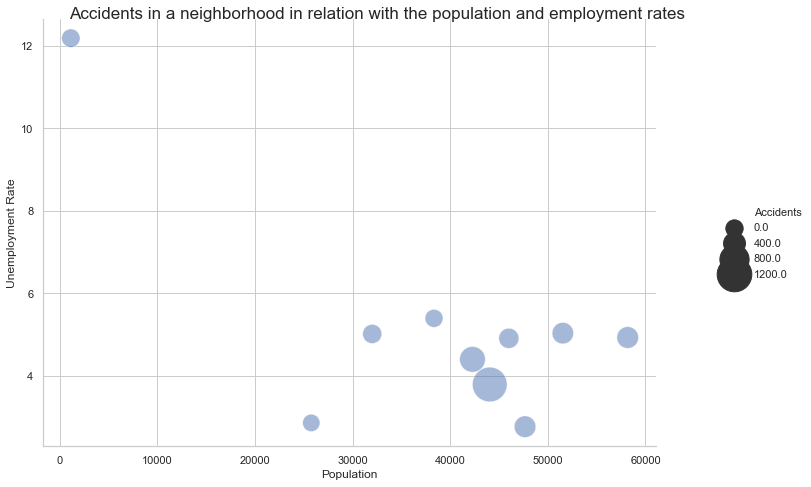

In [183]:
# create a scatterplot
sns_object = sns.relplot(x="Population", y="Unemployment_rate", size="Accidents",
            sizes=(300,1200), alpha=.5, palette="husl",
            height=6, data=nbs)
sns_object.fig.set_size_inches(12,7) # set figure size
sns_object.fig.suptitle('Accidents in a neighborhood in relation with the population and employment rates',size = 17) # set figure title
sns_object.set(ylabel='Unemployment Rate',xlabel='Population') # set labels

גרף זה מציג את אחוזי האבטלה ביחס לכמות האוכלוסייה בשכונה, כך שגודלה של נקודה עבור שכונה מייצגת את כמות התאונות שהתרחשו בה השנה.
אנחנו רואים שהשכונה la Dreta de l'Eixample היא השכונה החמישית בגודלה והשלישית באחוזי האבטלה הנמוכים בברצלונה.

מניתוח הנתונים הזה, אנחנו רואים שמדובר בשכונה מהגדולות בברצלונה ועם אחוזי אבטלה נמוכים במיוחד.
אבל - אנחנו עדיין לא מסופקים מהמידע הזה. נרצה להצליב עם מידע נוסף.

### ניתוח מאתר האינטרנט של עיריית ברצלונה

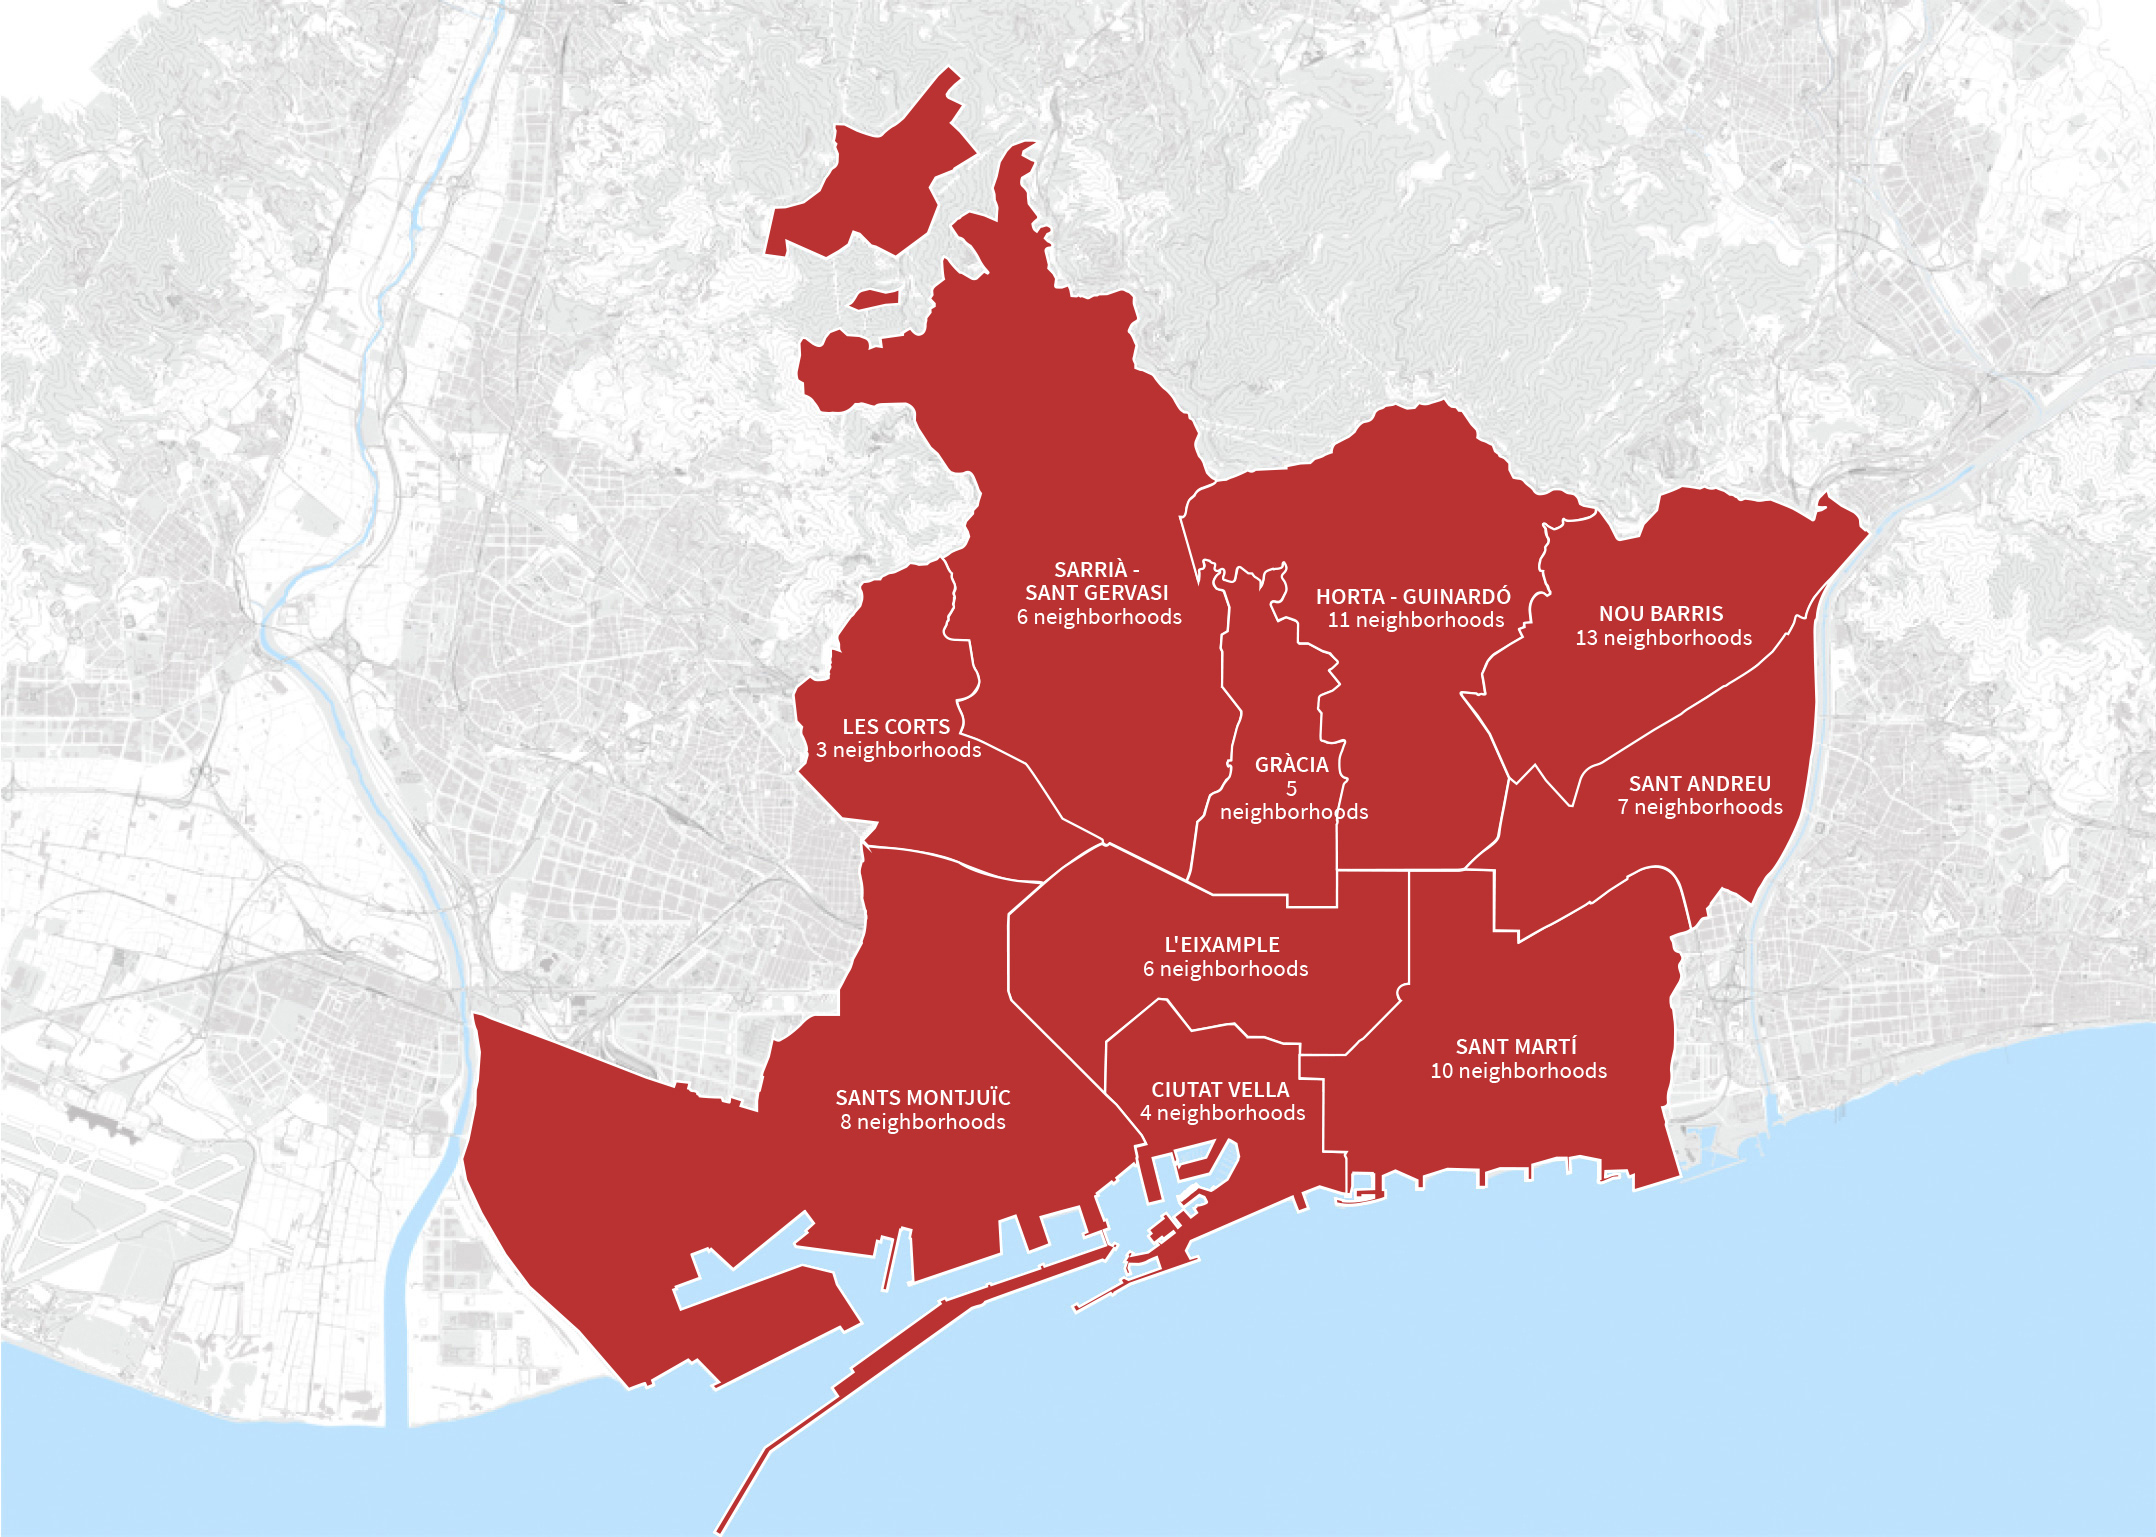

In [187]:
from IPython.display import Image
Image("barcelona_dis.jpg")

את התמונה הזאת לקחנו מאתר העירייה. השכונה
la Dreta de l'Eixample
נמצאת בתוך איזור
 l'Eixample.
 
איזור זה נמצא במרכז העיר.

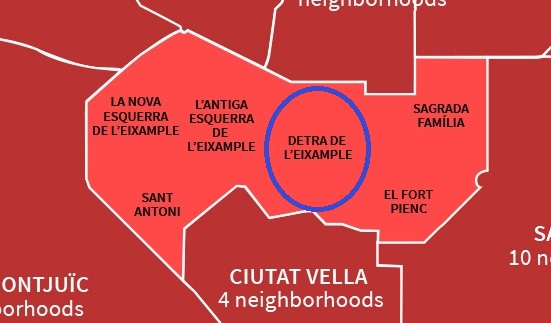

In [189]:
from IPython.display import Image
Image("barcelona_leixample.jpg")

השכונה נמצאת במרכז העיר.

מדובר בשכונה כנראה בעלת מקומות תעסוקה רבים, גדולה, מרכזית, בעלת צירי תנועה עמוסים. כנראה שזו הסיבה לכמות התאונות הגבוהה בשכונה הזאת.

### הצעות להורדת כמות התאונות בשכונה

עכשיו כשמצאנו את הסיבות לכמות התאונות הגבוהה בשכונה, נרצה לתת פתרונות לבעיה. ננתח את הנתונים על השכונה במטרה לתת המלצות מה הן הצמתים המסוכנות ונציג את המלצותינו במסמך.


In [315]:
# gets a coordination a nd return it with accuracy of 10 m
def shortNumber(num):
    return float("{0:.4f}".format(num))

In [302]:
# filter the neighborhoods df for just dreta neighborhood
dreta = df.loc[df.Neighborhood_Name == "la Dreta de l'Eixample"]
dreta.head()

,Id,District_Name,Neighborhood_Name,Street,Weekday,Month,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
7,2017S000008,Eixample,la Dreta de l'Eixample,ARAGÓ / Pau Claris ...,Sunday,January,1,10,Morning,2,0,2,2,2.166376,41.393276
12,2017S000013,Eixample,la Dreta de l'Eixample,ARAGÓ / Pg Gràcia ...,Sunday,January,1,15,Afternoon,1,0,1,1,2.164884,41.392165
39,2017S000040,Eixample,la Dreta de l'Eixample,BAILÈN / Rosselló ...,Monday,January,2,22,Night,1,0,1,2,2.166375,41.400128
45,2017S000046,Eixample,la Dreta de l'Eixample,ROGER DE LLÚRIA / Aragó ...,Tuesday,January,3,9,Morning,1,0,1,2,2.167508,41.394140
53,2017S000054,Eixample,la Dreta de l'Eixample,GIRONA ...,Tuesday,January,3,12,Morning,2,0,2,2,2.172375,41.394020


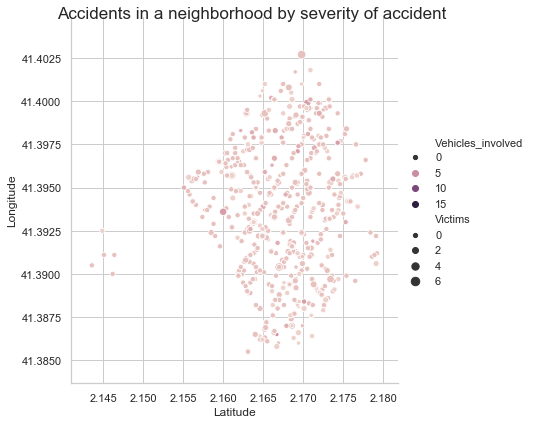

In [320]:
# create a scatterplot that will draw the accidents in neighborhood by the victims and vehicles involved (how bad was the accidents)
sns_object = sns.relplot(x="Longitude", y="Latitude", size = "Victims",hue = "Vehicles_involved", height=6, data=dreta)
sns_object.fig.suptitle('Accidents in a neighborhood by severity of accident',size = 17) # set figure title
sns_object.set(ylabel='Longitude',xlabel='Latitude') # set labels

In [304]:
# create a df where the Longitude and Latitude accuracy is up to 10 m.
dreta1 = dreta
dreta1['Longitude'] = dreta1['Longitude'].apply(lambda x: shortNumber(x))
dreta1['Latitude'] = dreta1['Latitude'].apply(lambda x: shortNumber(x))
dreta1.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,District_Name,Neighborhood_Name,Street,Weekday,Month,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
7,2017S000008,Eixample,la Dreta de l'Eixample,ARAGÓ / Pau Claris ...,Sunday,January,1,10,Morning,2,0,2,2,2.1664,41.3933
12,2017S000013,Eixample,la Dreta de l'Eixample,ARAGÓ / Pg Gràcia ...,Sunday,January,1,15,Afternoon,1,0,1,1,2.1649,41.3922
39,2017S000040,Eixample,la Dreta de l'Eixample,BAILÈN / Rosselló ...,Monday,January,2,22,Night,1,0,1,2,2.1664,41.4001
45,2017S000046,Eixample,la Dreta de l'Eixample,ROGER DE LLÚRIA / Aragó ...,Tuesday,January,3,9,Morning,1,0,1,2,2.1675,41.3941
53,2017S000054,Eixample,la Dreta de l'Eixample,GIRONA ...,Tuesday,January,3,12,Morning,2,0,2,2,2.1724,41.3940


In [317]:
# group the df to see how many accidents where in a squere(junction)
dreta_accidents =pd.DataFrame(dreta1.groupby(['Longitude','Latitude'])['Id'].count()).reset_index()
dreta_accidents.columns = ['Longitude','Latitude','Accidents']
dreta_accidents.head()

,Longitude,Latitude,Accidents
0,2.1436,41.3905,1
1,2.1449,41.3925,1
2,2.1451,41.3911,1
3,2.1462,41.3900,1
4,2.1464,41.3911,1


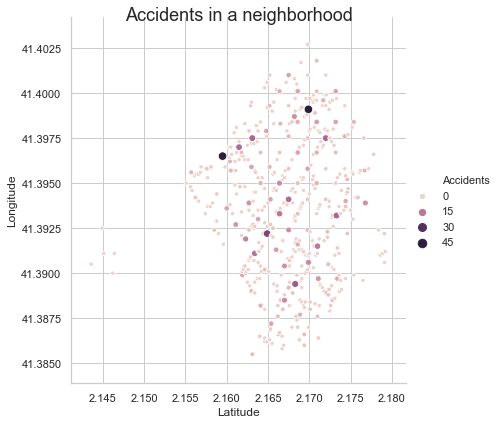

In [318]:
# see a junction an how namy accidents accured there
sns_object = sns.relplot(x="Longitude", y="Latitude",size = "Accidents", hue = "Accidents", height=6, data=dreta_accidents)
sns_object.fig.suptitle('Accidents in a neighborhood',size = 18) # set figure title
sns_object.set(ylabel='Longitude',xlabel='Latitude') # set labels

## מציאת הצמתים המסוכנות ביותר בשכונה

In [322]:
# get only criritcal junctions in the neighborhood.
critic = dreta_accidents.loc[dreta_accidents.Accidents >= 15].sort_values('Accidents',ascending = False).reset_index(drop = True)
print("The junctions that had more than 15 accidents in the past year:")
critic

The junctions that had more than 15 accidents in the past year:


,Longitude,Latitude,Accidents
0,2.1595,41.3965,35
1,2.1699,41.3991,35
2,2.1649,41.3922,25
3,2.1683,41.3894,20
4,2.1631,41.3975,18
5,2.1720,41.3975,18
6,2.1733,41.3932,18
7,2.1615,41.3970,17
8,2.1675,41.3941,17
9,2.1634,41.3911,16
